In [575]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid')
from numpy import sin, cos
from numpy.random import multivariate_normal as noise
from numpy import pi as PI

deltaT = 0.1 # seconds
sim_time = 100 # seconds
T = np.arange(0, sim_time, deltaT)
Nsteps = len(T)

class System :
    def __init__(self, F, B, H, Q, R, x0):
        self.F = F
        self.B = B
        self.H = H
        self.Q = Q
        self.R = R
        self.x = x0
        self.n = F.shape[0]
        self.p = H.shape[0]

    def update_state(self, u):
        self.x = self.F @ self.x + self.B @ u + noise(np.zeros(self.n), self.Q)

    def measure(self):
        return self.H @ self.x + noise(np.zeros(self.p), self.R)
      
class Kalman : 
    # To be made for matrices
    def __init__ (self, F, B, H, Q, R, x0 , P_init):
        self.F = F
        self.B = B
        self.H = H
        self.Q = Q
        self.R = R
        self.x_hat = x0
        self.Pbar = None
        self.P = P_init

    def predict(self, u):
        self.x_hat = self.F * self.x_hat + self.B * u
        self.Pbar = self.F * self.P * self.F.T + self.Q
    
    def update(self, z):
        K = self.Pbar @ self.H.T @ np.linalg.inv(self.H @ self.Pbar @ self.H.T + self.R)
        self.x_hat = self.x_hat + K @ (z - self.H * self.x_hat)
        self.P = self.Pbar - K * self.H * self.Pbar


In [576]:
X = np.empty(Nsteps)
X_hat = np.empty(Nsteps)
Z = np.empty(Nsteps)
F = np.array([1])
B = np.array([deltaT])
H = np.array([1])
Q = np.array([[5]])
R = np.array([[3]])
x0_real = np.array([0])
x0 = np.array([10])
cart = System(F, B, H, Q, R, x0_real)
kalman = Kalman(F, B, H, Q, R, x0, np.array([[20]]))
for i in range(Nsteps):
    u = np.array([10*sin(T[i])])
    # u = np.array([10])
    cart.update_state(u)
    kalman.predict(u)
    z = cart.measure()
    kalman.update(z)
    X[i] = cart.x
    X_hat[i] = kalman.x_hat
    Z[i] = z
print(np.average(Z-X))
print(np.average(X_hat-X))

-0.007768328640444154
0.028031037607923887


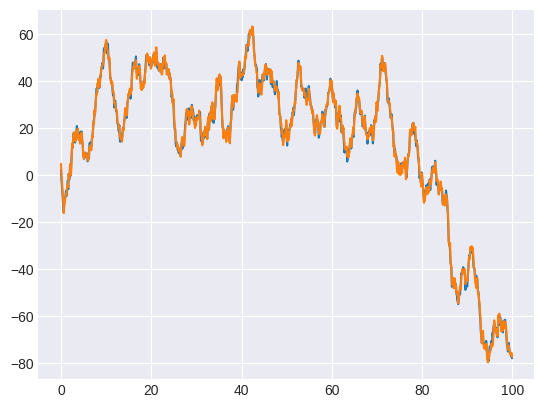

In [577]:
plt.plot(T, X)
plt.plot(T, X_hat)

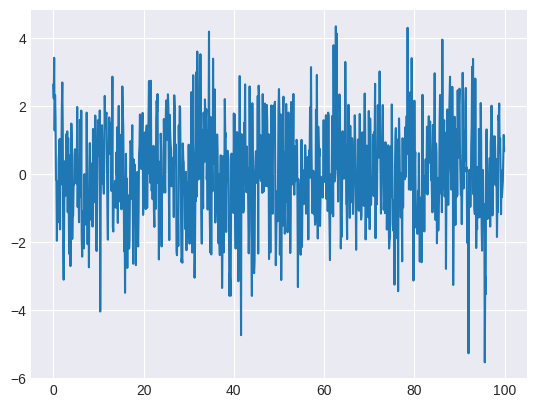

In [578]:
plt.plot(T, X_hat - X)